# Face Detection Project

In [10]:
import os
from glob import glob

So, we have 2 folders, one with images of normal people and the other with images of Tom Cruise.
Since, we have only 100 images of Tom Cruise, we will have to use augmentation to increase the 
sample size. In total the goal is to, get around 600 images for both the category

# Data Preprocessing

In [13]:
import cv2, os

dataset_path = 'F:\My_Disk\python\Projects\image data\data'
categories = os.listdir(dataset_path)
labels = [i for i in range(len(categories))]

label_dict = dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)


{'normal people': 0, 'Tom Cruise': 1}
['normal people', 'Tom Cruise']
[0, 1]


### Add new images to tom cruise folder, using augmentation

In [4]:
tom_cruise = dataset_path+'\Tom Cruise'
import Augmentor

p = Augmentor.Pipeline(tom_cruise)
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 100 image(s) found.
Output directory set to F:\My_Disk\python\Projects\image data\data\Tom Cruise\output.

Processing <PIL.Image.Image image mode=RGB size=160x160 at 0x213C166CB50>: 100%|██████████| 500/500 [00:09<00:00, 52.09 Samples/s]                  


In [3]:
img_size = 100
data = []
target = []


for category in categories:
    folder_path = os.path.join(dataset_path,category)
    img_names = os.listdir(folder_path)
        
    for img_name in img_names:
        img_path = os.path.join(folder_path,img_name)
        img = cv2.imread(img_path)
        

        try:
            if(img is not None):
                gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
                #Coverting the image into gray scale
                resized=cv2.resize(gray,(img_size,img_size))
                #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
                data.append(resized)
                target.append(label_dict[category])
                #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image


In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [22]:
import numpy as np
from numpy import save
data = np.array(data)/255.0
data = np.reshape(data,(data.shape[0],img_size,img_size,1))
target = np.array(target)

new_target = to_categorical(target)

In [21]:
save('data.npy',data)
save('target.npy',new_target)

In [23]:
data=np.load('data.npy')
target=np.load('target.npy')

# Model 

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [29]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train_test_split(data,target,test_size=0.25)


In [30]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
trained_model = model.fit(train_data,train_target,epochs=10,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/10
30/30 [==============================] - ETA: 0s - loss: 0.6863 - accuracy: 0.5672INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


30/30 [==============================] - 69s 2s/step - loss: 0.6863 - accuracy: 0.5672 - val_loss: 0.5857 - val_accuracy: 0.7553
Epoch 2/10
30/30 [==============================] - ETA: 0s - loss: 0.4983 - accuracy: 0.7503INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


30/30 [==============================] - 59s 2s/step - loss: 0.4983 - accuracy: 0.7503 - val_loss: 0.3928 - val_accuracy: 0.8186
Epoch 3/10
30/30 [==============================] - 58s 2s/step - loss: 0.3361 - accuracy: 0.8603 - val_loss: 0.4000 - val_accuracy: 0.8143
Epoch 4/10
30/30 [==============================] - ETA: 0s - loss: 0.2925 - accuracy: 0.8751INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


30/30 [==============================] - 60s 2s/step - loss: 0.2925 - accuracy: 0.8751 - val_loss: 0.2428 - val_accuracy: 0.9030
Epoch 5/10
30/30 [==============================] - ETA: 0s - loss: 0.1989 - accuracy: 0.9132INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


30/30 [==============================] - 61s 2s/step - loss: 0.1989 - accuracy: 0.9132 - val_loss: 0.2078 - val_accuracy: 0.9156
Epoch 6/10
30/30 [==============================] - 57s 2s/step - loss: 0.1466 - accuracy: 0.9397 - val_loss: 0.2260 - val_accuracy: 0.8987
Epoch 7/10
30/30 [==============================] - ETA: 0s - loss: 0.1277 - accuracy: 0.9481INFO:tensorflow:Assets written to: model-007.model\assets


INFO:tensorflow:Assets written to: model-007.model\assets


30/30 [==============================] - 59s 2s/step - loss: 0.1277 - accuracy: 0.9481 - val_loss: 0.1872 - val_accuracy: 0.9114
Epoch 8/10
30/30 [==============================] - 57s 2s/step - loss: 0.1087 - accuracy: 0.9587 - val_loss: 0.1974 - val_accuracy: 0.9325
Epoch 9/10
30/30 [==============================] - ETA: 0s - loss: 0.0970 - accuracy: 0.9640INFO:tensorflow:Assets written to: model-009.model\assets


INFO:tensorflow:Assets written to: model-009.model\assets


30/30 [==============================] - 61s 2s/step - loss: 0.0970 - accuracy: 0.9640 - val_loss: 0.1637 - val_accuracy: 0.9283
Epoch 10/10
30/30 [==============================] - 56s 2s/step - loss: 0.0593 - accuracy: 0.9746 - val_loss: 0.1874 - val_accuracy: 0.9325


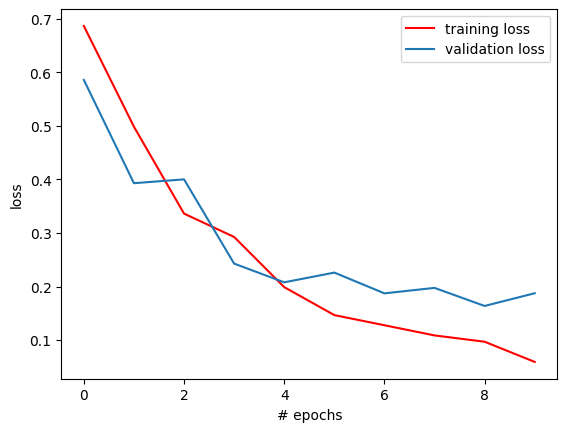

In [31]:
from matplotlib import pyplot as plt

plt.plot(trained_model.history['loss'],'r',label='training loss')
plt.plot(trained_model.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


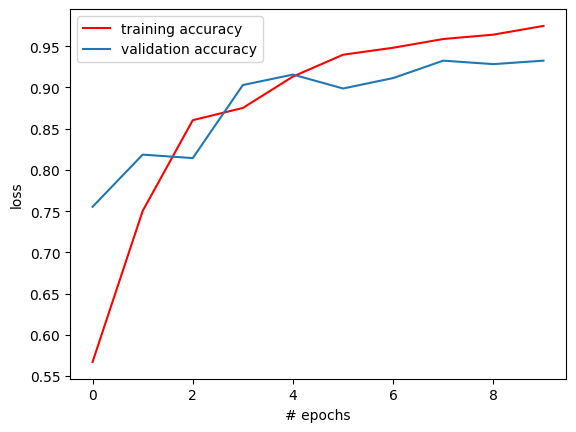

In [32]:
plt.plot(trained_model.history['accuracy'],'r',label='training accuracy')
plt.plot(trained_model.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [33]:
print(model.evaluate(test_data,test_target))

13/13 [==============================] - 7s 527ms/step - loss: 0.1353 - accuracy: 0.9519
[0.1353016197681427, 0.9518987536430359]


In [34]:
model.save("tomcruise_detector.model", save_format="h5")

f:\My_Disk\python\Projects\image data\venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
# from sklearn.metrics import classification_report, confusion_matrix
# cnf_matrix = confusion_matrix(train_target, test_target, labels=[0,1])
# np.set_printoptions(precision=2)

# print (classification_report(train_target, test_target))

# import seaborn as sns

# ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')

# ax.set_title('Seaborn Confusion Matrix with labels\n\n')
# ax.set_xlabel('\nPredicted Values')
# ax.set_ylabel('\nActual Values ')

# ## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['1: Mask', '0: No Mask'])
# ax.yaxis.set_ticklabels(['1: Mask','0: No Mask'])

# ## Display the visualization of the Confusion Matrix.

# plt.show()